In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import pandas as pd

from PIL import Image
np.set_printoptions(precision=4, suppress=True)

In [2]:
# You need to show the work on the homework to get credit, but let's see how you can check your work in python:
A = np.array([[4, 0],
              [3, -5]])

# Perform SVD
U, S, VT = np.linalg.svd(A)

# Print the decomposed matrices
print("U matrix:")
print(U)

print("\nS matrix (as a vector):")
print(S)

print("\nVT matrix:")
print(VT)

# If you want to reconstruct the original matrix
Sigma = np.zeros(A.shape)
for i in range(min(A.shape)):
    Sigma[i, i] = S[i]

reconstructed_A = np.dot(U, np.dot(Sigma, VT))
print("\nReconstructed A matrix:")
print(reconstructed_A)

# Select k singular values
k = 2 # For this example, but you can choose another value less than the rank of A

U_k = U[:, :k]
S_k = np.diag(S[:k])
VT_k = VT[:k, :]

# Approximate matrix A using k singular values
approximated_A = np.dot(U_k, np.dot(S_k, VT_k))


print("\nApproximated A matrix using", k, "singular values:")
print(approximated_A)


U matrix:
[[-0.4472 -0.8944]
 [-0.8944  0.4472]]

S matrix (as a vector):
[6.3246 3.1623]

VT matrix:
[[-0.7071  0.7071]
 [-0.7071 -0.7071]]

Reconstructed A matrix:
[[ 4. -0.]
 [ 3. -5.]]

Approximated A matrix using 2 singular values:
[[ 4. -0.]
 [ 3. -5.]]


In [3]:
B=np.array([[2,2,8,9],[7,6,1,3],[4,4,9,7],[10,8,1,2]])
# Perform SVD
U, S, VT = np.linalg.svd(B)

# Print the decomposed matrices
print("U matrix:")
print(U)

print("\nS matrix (as a vector):")
print(S)

print("\nVT matrix:")
print(VT)

# If you want to reconstruct the original matrix
Sigma = np.zeros(B.shape)
for i in range(min(B.shape)):
    Sigma[i, i] = S[i]

reconstructed_B = np.dot(U, np.dot(Sigma, VT))
print("\nReconstructed B matrix:")
print(reconstructed_B)
# Select k singular values
k = 2 # For this example, but you can choose another value less than the rank of A

U_k = U[:, :k]
S_k = np.diag(S[:k])
VT_k = VT[:k, :]

# Approximate matrix A using k singular values
approximated_B = np.dot(U_k, np.dot(S_k, VT_k))


print("\nApproximated B matrix using", k, "singular values:")
print(approximated_B)
print(reconstructed_B-approximated_B)

U matrix:
[[-0.5     0.5547  0.5839  0.3183]
 [-0.41   -0.3886  0.4088 -0.7168]
 [-0.5699  0.3625 -0.6888 -0.2634]
 [-0.507  -0.6402 -0.1322  0.5617]]

S matrix (as a vector):
[20.9282 11.7207  1.8849  0.2898]

VT matrix:
[[-0.5361 -0.4681 -0.48   -0.5129]
 [-0.56   -0.4176  0.5692  0.4337]
 [-0.0252 -0.1018 -0.6638  0.7405]
 [ 0.6312 -0.7721  0.0707 -0.0213]]

Reconstructed B matrix:
[[ 2.  2.  8.  9.]
 [ 7.  6.  1.  3.]
 [ 4.  4.  9.  7.]
 [10.  8.  1.  2.]]

Approximated B matrix using 2 singular values:
[[1.9695 2.1833 8.724  8.1869]
 [7.1505 5.9181 1.5262 2.4249]
 [4.0155 3.8089 8.1436 7.9598]
 [9.891  8.1003 0.8231 2.188 ]]
[[ 0.0305 -0.1833 -0.724   0.8131]
 [-0.1505  0.0819 -0.5262  0.5751]
 [-0.0155  0.1911  0.8564 -0.9598]
 [ 0.109  -0.1003  0.1769 -0.188 ]]


Let's write a function 

In [4]:


def perform_svd(file_name, num_singular_values=None):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    #df.drop([0])
    
    # Perform SVD
    U, S, VT = np.linalg.svd(df, full_matrices=False)
    
    # If num_singular_values is specified, approximate the original matrix
    if num_singular_values:
        # Drop smaller singular values and reconstruct the approximation
        S[num_singular_values:] = 0
        approximate_matrix = U @ np.diag(S) @ VT
        return approximate_matrix
    
    return U, S, VT, df




Let's load in some fake data for movie ratings. Let's look at ratings for 100 movies and 50 viewers.
The movies come from different categories, and the data was generated as if each viewer had a preference for the type of film they liked to watch.

In [5]:
file_name = 'movie_ratings_new.csv'
U, S, VT, df = perform_svd(file_name)
df.head(50)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,10,10,9,10,10,8,9,10,9,8,...,5,1,2,1,3,4,1,4,5,5
1,3,5,2,4,3,4,4,1,1,2,...,3,3,3,2,1,2,3,3,3,2
2,3,4,4,2,1,3,2,2,3,2,...,3,5,2,4,3,2,3,2,5,2
3,2,1,2,3,3,1,5,2,2,5,...,10,9,8,8,8,10,9,9,8,8
4,10,8,8,8,8,8,10,9,10,10,...,2,5,4,5,1,5,2,2,5,3
5,4,4,3,1,4,3,2,1,4,4,...,3,4,4,5,4,4,4,2,2,3
6,1,1,1,1,4,4,2,3,1,5,...,3,1,3,3,3,1,2,5,4,4
7,2,5,5,1,4,3,4,1,4,5,...,10,9,8,8,10,10,10,8,9,8
8,9,10,9,8,9,10,9,10,8,10,...,1,1,4,4,4,2,4,4,2,3
9,3,5,3,4,5,2,5,4,5,5,...,3,4,4,1,1,1,5,5,2,1


In [6]:
# Let's look at the singular values
print(S)

[320.0223 111.9109 105.4732 103.6814  20.2732  19.8431  19.4102  19.3383
  18.3429  17.9725  17.0679  16.8618  16.4697  16.1581  16.1223  15.4223
  14.9511  14.7376  14.4313  14.14    13.8505  13.3386  13.1337  12.6598
  12.1569  12.0599  11.6572  11.2864  11.1123  10.9155  10.7543  10.2277
   9.7274   9.4937   9.2505   8.8647   8.7528   8.4865   7.9518   7.7184
   7.498    7.2263   7.0126   6.2288   5.8571   5.7868   5.4063   4.7782
   4.3715   3.8754]


## Question
Based off of the singular values, how many categories of movies do you think there are?

In [7]:
# Let's look at just the first row for the approximated matrix and the actual ratings for the first viewer
k=5
approximated_matrix = perform_svd(file_name, k)
print(approximated_matrix[0])
print(np.array(df.head(1))[0])
print(f"The most that any movie is off by is using %s singular values is %s" % (k, max(abs(np.array(df.head(1))[0]-approximated_matrix[0]))))
print("The average difference is ",np.mean(abs(np.array(df.head(1))[0]-approximated_matrix[0])))

[9.2078 9.0474 9.1773 8.1344 8.7077 8.6143 8.9329 9.2095 9.0629 8.6623
 8.5425 8.8428 8.6387 8.9431 9.1132 9.0962 8.6326 9.2464 8.7616 9.1271
 9.1726 8.8706 9.183  8.8294 9.1976 3.8732 2.7437 3.1747 3.3262 2.509
 2.7669 3.1524 3.3107 3.4847 2.3527 3.09   2.4859 3.5961 3.0276 2.2691
 2.42   3.3731 3.6431 2.5363 3.4508 2.403  2.5831 2.6968 3.311  2.9495
 3.6451 3.2964 3.5687 3.5288 3.1215 4.2446 2.8223 3.4495 3.3335 3.9711
 3.5615 3.1559 3.5302 3.1977 3.6688 2.92   3.7997 3.1547 4.0512 3.4293
 3.0096 2.697  2.8439 3.764  2.9818 2.7154 2.3255 2.1868 3.3174 3.0857
 3.1516 2.8664 3.2965 3.4325 2.6457 2.5933 3.0893 3.0631 2.6734 1.6427
 2.8652 2.412  3.5185 3.6075 2.8813 3.6106 2.4379 3.0053 3.2317 3.0703]
[10 10  9 10 10  8  9 10  9  8  8  8  9  8  9 10  9  9  8  8 10  8  9  8
 10  1  3  4  4  3  5  1  5  4  2  1  4  1  5  3  1  2  5  1  5  3  2  3
  4  3  3  4  5  5  5  4  3  4  2  3  1  4  4  2  4  2  5  4  3  5  2  1
  2  3  4  1  1  1  3  4  2  4  3  4  4  4  1  1  4  4  5  1  2  1  3  

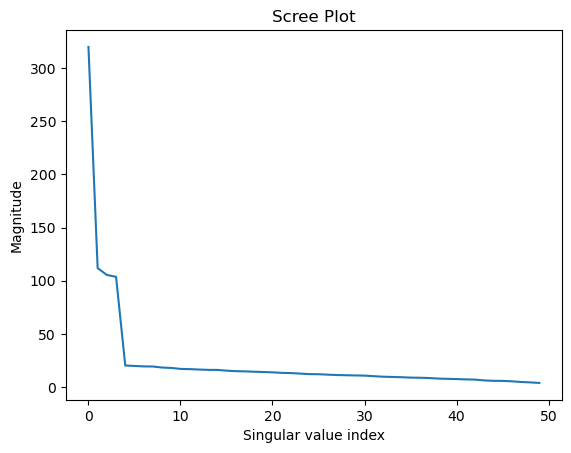

In [8]:
# We can use a scree plot, which is just a ranking of the singular values to see where most of the data is contained:
plt.plot(S)
plt.xlabel('Singular value index')
plt.ylabel('Magnitude')
plt.title('Scree Plot')
plt.show()


Let's load in a image of my adorable cat Lucian

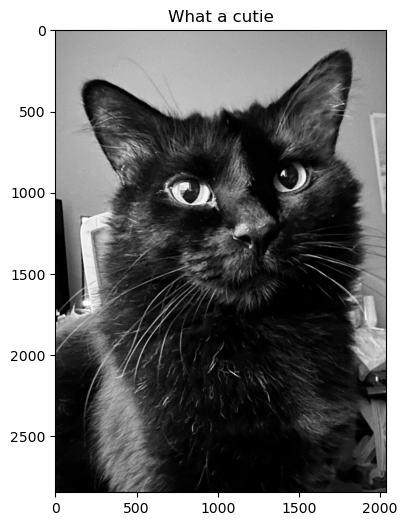

In [9]:
img = Image.open('cat.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
# Calculate the memory size in MB of the reconstimg
memory_size_MB = imgmat.nbytes / (1024 * 1024)
title = "What a cutie"
plt.figure(figsize=(9,6))
plt.title(title)
plt.imshow(imgmat, cmap='gray');


Now to compute the singular value decomposition:

In [10]:
U, sigma, V = np.linalg.svd(imgmat)
full_decomposition_size = U.nbytes + np.diag(sigma).nbytes + V.nbytes


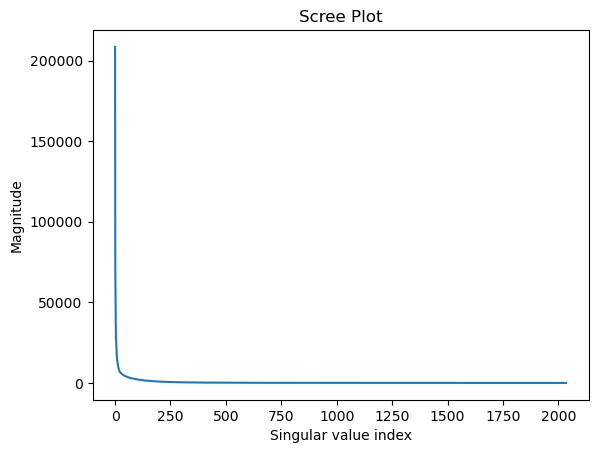

In [11]:
plt.plot(sigma)
plt.xlabel('Singular value index')
plt.ylabel('Magnitude')
plt.title('Scree Plot')
plt.show()

Using only 5 of the slightly over 2000 singular values, we are seeing the cat shape start to appear:

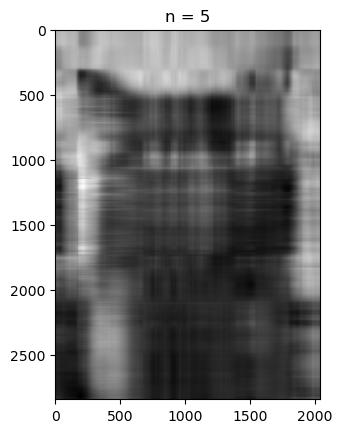

In [12]:
reconstimg = np.matrix(U[:, :5]) * np.diag(sigma[:5]) * np.matrix(V[:5, :])
plt.imshow(reconstimg, cmap='gray')

# Calculate the memory size in MB of the reconstimg
memory_size_MB = reconstimg.nbytes / (1024 * 1024)
title = f"n = 5"

plt.title(title)
plt.show()

At 10 singular values, we're starting to see the cuteness recovered:

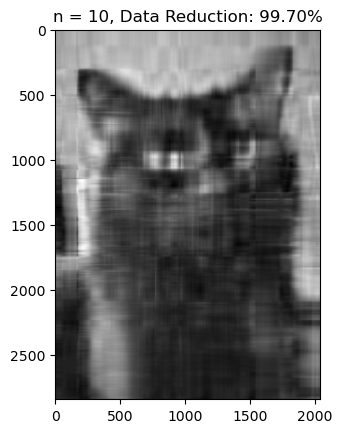

In [13]:
i=10
truncated_U = U[:, :i]
truncated_Sigma = np.diag(sigma[:i])
truncated_V = V[:i, :]

reconstimg = truncated_U * truncated_Sigma * truncated_V
plt.imshow(reconstimg, cmap='gray')

# Calculate the memory size of the truncated matrices
compressed_size = (truncated_U.nbytes + truncated_Sigma.nbytes + truncated_V.nbytes)
compression_ratio = (1 - compressed_size / full_decomposition_size) * 100
title = f"n = {i}, Data Reduction: {compression_ratio:.2f}%"

plt.title(title)
plt.show()

With only a handful more of singular values, we can get a significantly better picture and use only a fraction of the amount of data:

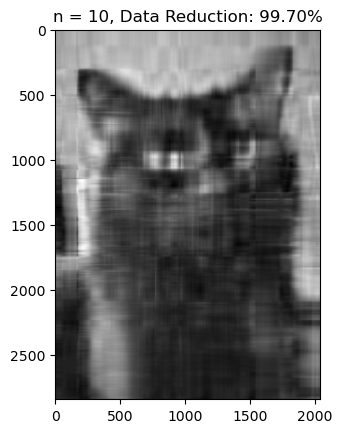

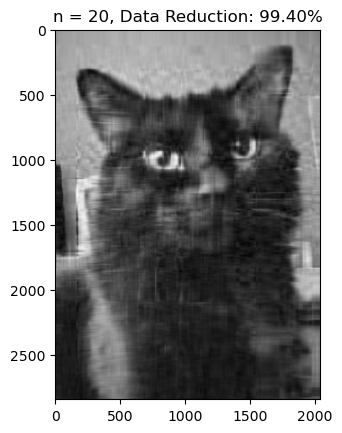

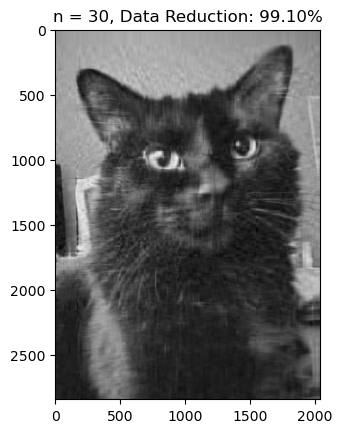

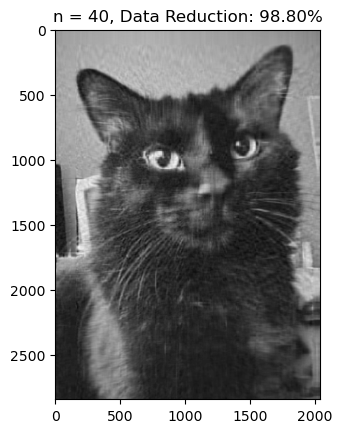

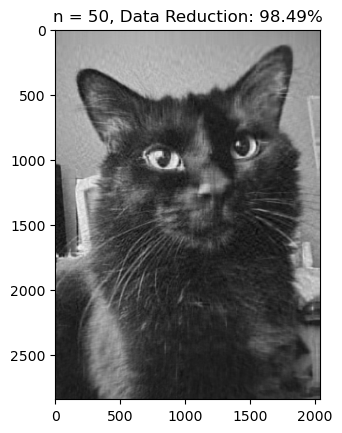

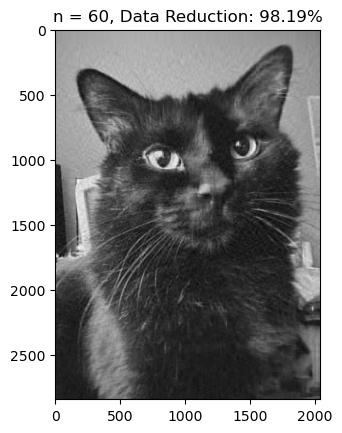

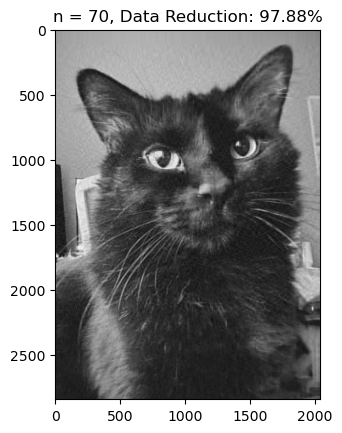

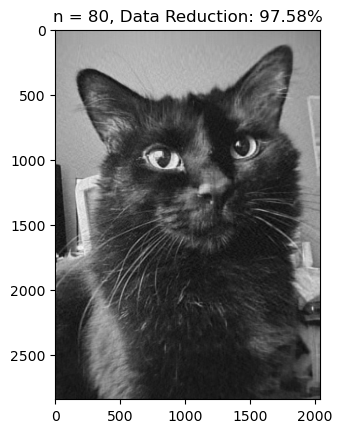

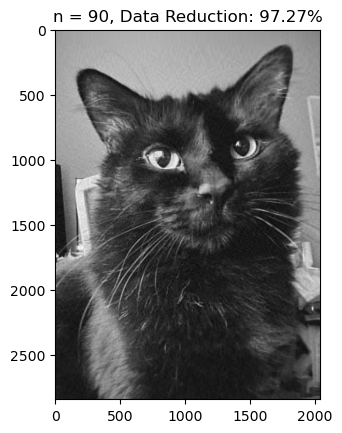

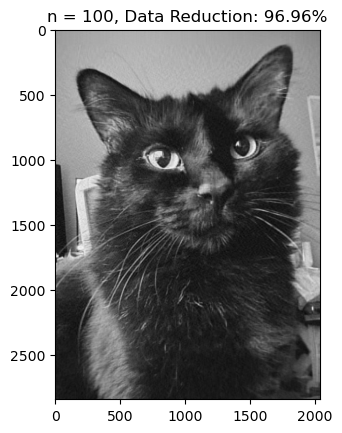

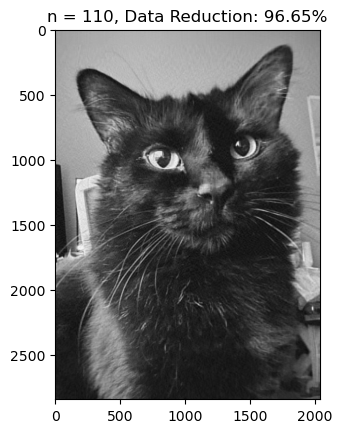

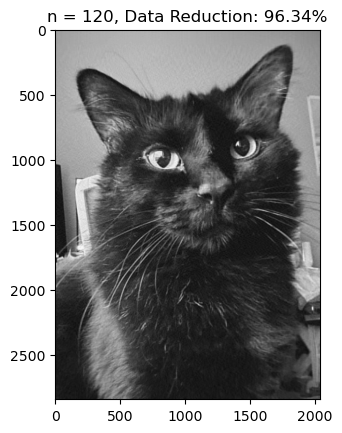

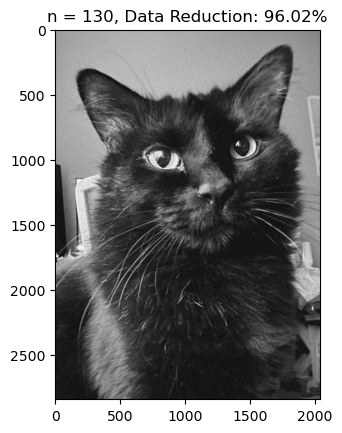

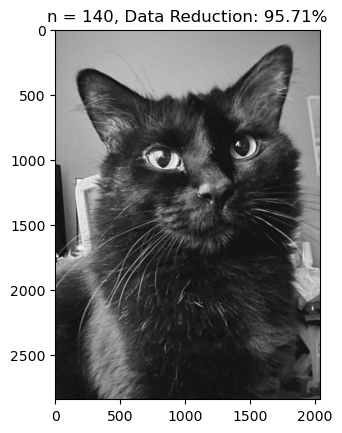

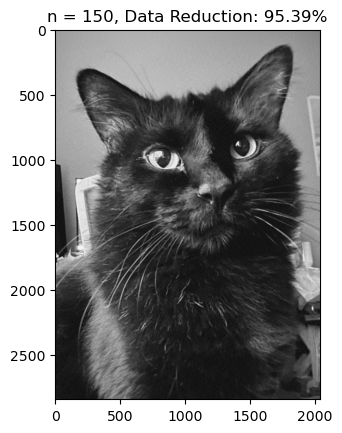

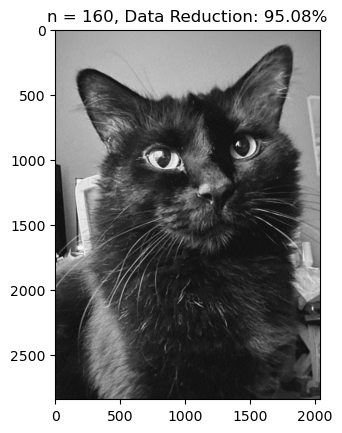

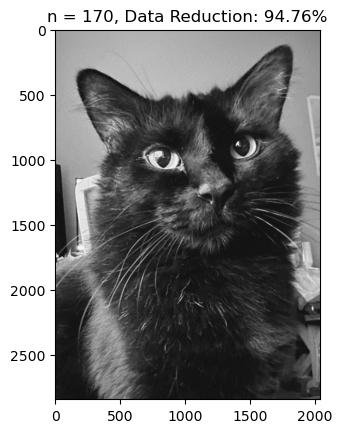

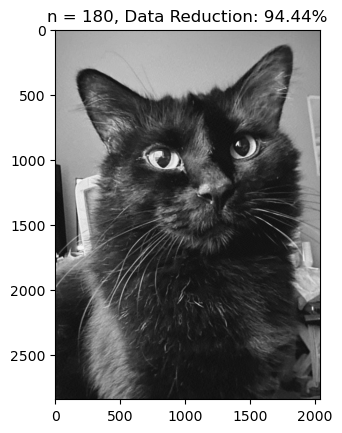

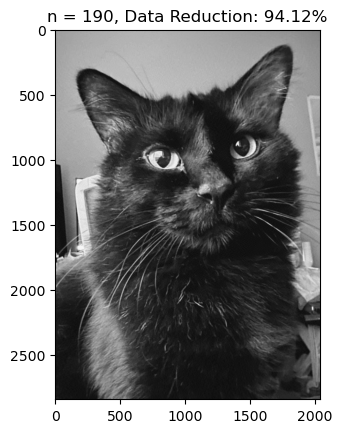

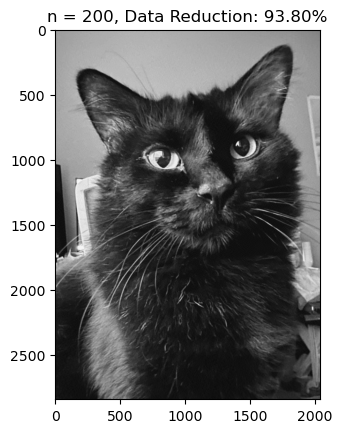

In [14]:
# Size of the fully decomposed matrices
full_decomposition_size = U.nbytes + np.diag(sigma).nbytes + V.nbytes

# Plot reconstructed images and display data size reduction
for i in range(10, 201, 10):
    truncated_U = U[:, :i]
    truncated_Sigma = np.diag(sigma[:i])
    truncated_V = V[:i, :]
    
    reconstimg = truncated_U * truncated_Sigma * truncated_V
    plt.imshow(reconstimg, cmap='gray')
    
    # Calculate the memory size of the truncated matrices
    compressed_size = (truncated_U.nbytes + truncated_Sigma.nbytes + truncated_V.nbytes)
    compression_ratio = (1 - compressed_size / full_decomposition_size) * 100
    title = f"n = {i}, Data Reduction: {compression_ratio:.2f}%"
    
    plt.title(title)
    plt.show()
